In [1]:
import random
from math import sqrt

In [2]:
def random_in_circle():
    x = 2*random.random() - 1
    y = random.random()
    if x**2 + y**2 <= 1:
        return (x,y)
    return random_in_circle()

In [3]:
random_in_circle()

(-0.020705949913222055, 0.42457238388727603)

In [4]:
# Taken from my old number theory library, based 
# on Stein's old number theory library

def primes(n):
    """
    Returns a list of the primes up to n, computed
    using the Sieve of Eratosthenes.
    Input:
        n -- a positive integer
    Output:
        list -- a list of the primes up to n
    Examples:
    >>> primes(10)
    [2, 3, 5, 7]
    >>> primes(45)
    [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43]
    """
    if n <= 1: return []
    X = [i for i in range(3,n+1) if i%2 != 0] 
    P = [2]                                   
    sqrt_n = sqrt(n)                         
    while len(X) > 0 and X[0] <= sqrt_n:    
        p = X[0]                           
        P.append(p)                        
        X = [a for a in X if a%p != 0]     
    return P + X

def trial_division(n, bound=None):
    """
    Return the smallest prime divisor <= bound of the
    positive integer n, or n if there is no such prime.
    If the optional argument bound is omitted, then bound=n.
    Input:
        n -- a positive integer
        bound - (optional) a positive integer
    Output:
        int -- a prime p<=bound that divides n, or n if
               there is no such prime.
    Examples:
    >>> trial_division(15)
    3
    >>> trial_division(91)
    7
    >>> trial_division(11)
    11
    >>> trial_division(387833, 300)
    387833
    >>> # 300 is not big enough to split off a
    >>> # factor, but 400 is.
    >>> trial_division(387833, 400)
    389
    """
    if n == 1: return 1
    for p in [2, 3, 5]:
        if n%p == 0: return p
    if bound == None: bound = n
    dif = [6, 4, 2, 4, 2, 4, 6, 2]
    m = 7; i = 1
    while m <= bound and m*m <= n:
        if n%m == 0:
            return m
        m += dif[i%8]
        i += 1
    return n

def factor(n):
    """
    Returns the factorization of the integer n as
    a sorted list of tuples (p,e), where the integers p
    are output by the split algorithm.
    Input:
        n -- an integer
    Output:
        list -- factorization of n
    Examples:
    >>> factor(500)
    [(2, 2), (5, 3)]
    >>> factor(-20)
    [(2, 2), (5, 1)]
    >>> factor(1)
    []
    >>> factor(2004)
    [(2, 2), (3, 1), (167, 1)]
    """
    if n in [-1, 0, 1]: return []
    if n < 0: n = -n
    F = []
    while n != 1:
        p = trial_division(n)
        e = 1
        n /= p
        while n%p == 0:
            e += 1; n /= p
        F.append((p,e))
    F.sort()
    return F

In [5]:
primes_to_1000 = primes(1000)

In [6]:
primes_to_1000[:10]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [7]:
coeffs = dict()
for p in primes_to_1000:
    coeffs[p] = random_in_circle()[0]*2

In [8]:
coeffs[1] = 1
for i in range(2, 1001):
    factors = factor(i)
    if len(factors) == 1:
        if factors[0][1] == 1:
            continue
    coeffs[i] = 1
    for p, e in factors:
        if e%2 == 0:
            coeffs[i] = 0
        else:
            coeffs[i] = coeffs[i]*coeffs[p]**e

In [9]:
coeffs[2]

-0.12970367168797514

In [10]:
coeffs[3]

-0.255625646661505

In [11]:
coeffs[6]

0.033155584949610184

In [12]:
coeffs[2]*coeffs[3]

0.033155584949610184

In [13]:
for i in range(1,20):
    print(coeffs[i])

1
-0.12970367168797514
-0.255625646661505
0
1.8182581168191447
0.033155584949610184
0.8271602113977274
-0.0021820103746423296
0
-0.2358347538279063
-0.6068827187589032
-0.0
0.35786347824696385
-0.10728571649248696
-0.46479340690942417
0
-0.6607639018795846
0
-1.0658412594109477


In [14]:
sums = dict()
sums[0] = 0
for i in range(1, len(coeffs)):
    sums[i] = sums[i-1] + coeffs[i]

In [15]:
for i in range(10):
    print(sums[i])

0
1
0.8702963283120249
0.6146706816505199
0.6146706816505199
2.4329287984696646
2.466084383419275
3.2932445948170024
3.29106258444236
3.29106258444236


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
import numpy as np

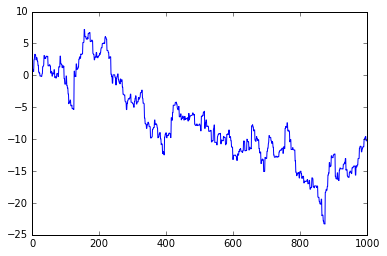

In [19]:
xs = range(len(sums))
ys = [sums[i] for i in range(len(sums))]
plt.plot(xs, ys)

In [20]:
primes_to_1000000 = primes(1000000)

coeffs = dict()
for p in primes_to_1000000:
    coeffs[p] = random_in_circle()[0]*2
coeffs[1] = 1

for i in range(2, 1000000):
    factors = factor(i)
    if len(factors) == 1:
        if factors[0][1] == 1:
            continue
    coeffs[i] = 1
    for p, e in factors:
        if e%2 == 0:
            coeffs[i] = 0
        else:
            coeffs[i] = coeffs[i]*coeffs[p]**e
            
sums = dict()
sums[0] = 0
for i in range(1, len(coeffs)):
    sums[i] = sums[i-1] + coeffs[i]

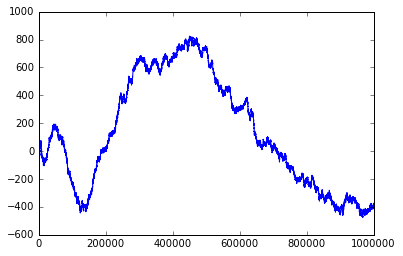

In [21]:
xs = range(len(sums))
ys = [sums[i] for i in range(len(sums))]
plt.plot(xs, ys)

In [22]:
max([sums[i]/i**.5 for i in range(1, len(sums))])

1.2382208307041762

In [23]:
len(list(filter(lambda e: e >= .5, [sums[i]/i**.33 for i in range(1, len(sums))])))

539077

In [24]:
import dld_plot as myplot

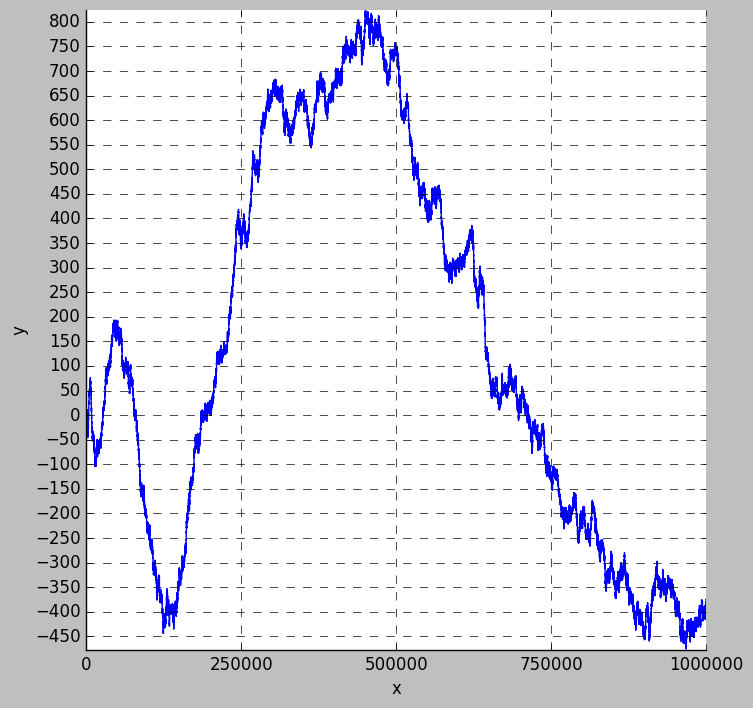

In [25]:
plt.style.use('classic')
ymin = min([sums[i] for i in range(len(sums))])
ymax = max([sums[i] for i in range(len(sums))])
myplot.make_one_plot_by_pts(xs, ys, xmin=0, ymin=ymin-1, xmax = 1000000, ymax=ymax+1,
                            xtick_mult=250000, ytick_mult=50, figname='test', save_format="png",
                           usecolor=True, figsize_x=8, figsize_y=8)

(array([  140.,   239.,   336.,   348.,   387.,   465.,   558.,   494.,
          562.,   552.,   622.,   639.,   663.,   680.,   675.,   783.,
          660.,   717.,   780.,   813.,   802.,   815.,   831.,   792.,
          835.,   875.,   849.,   872.,   882.,   878.,   861.,   948.,
          973.,   951.,   953.,   962.,   983.,   997.,   991.,  1008.,
          996.,   919.,   979.,   980.,   967.,   965.,   970.,   972.,
          960.,   950.,  1016.,   987.,   988.,   990.,   973.,  1013.,
          966.,   972.,   993.,  1044.,  1006.,   954.,   971.,   968.,
          954.,   964.,   884.,   936.,   935.,   861.,   921.,   942.,
          890.,   893.,   875.,   907.,   851.,   835.,   827.,   834.,
          857.,   779.,   795.,   780.,   741.,   729.,   655.,   700.,
          630.,   633.,   610.,   606.,   535.,   479.,   468.,   428.,
          378.,   318.,   255.,   143.]),
 array([ -1.99700717e+00,  -1.95705967e+00,  -1.91711217e+00,
         -1.87716467e+00,  -1.83

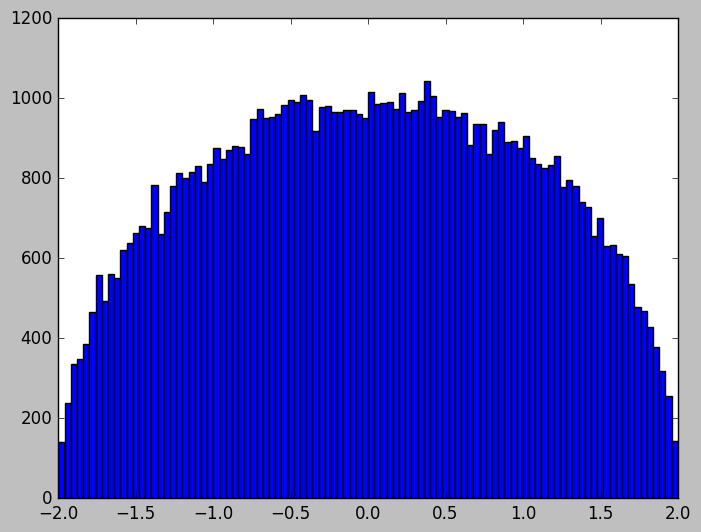

In [26]:
plt.hist([coeffs[p] for p in primes_to_1000000], bins=100)

(array([  2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          1.00000000e+01,   1.40000000e+01,   2.20000000e+01,
          2.10000000e+01,   3.60000000e+01,   7.10000000e+01,
          7.40000000e+01,   9.00000000e+01,   9.80000000e+01,
          1.33000000e+02,   1.57000000e+02,   2.04000000e+02,
          2.31000000e+02,   3.14000000e+02,   4.27000000e+02,
          5.04000000e+02,   5.90000000e+02,   6.38000000e+02,
          1.22700000e+03,   1.75700000e+03,   2.25700000e+03,
          2.56600000e+03,   2.94400000e+03,   3.28100000e+03,
          3.56800000e+03,   3.75600000e+03,   4.09000000e+03,
          4.30600000e+03,   4.61800000e+03,   4.98200000e+03,
          5.34400000e+03,   5.92300000e+03,   6.86200000e+03,
          9.88900000e+03,   1.35480000e+04,   1.84570000e+04,
          2.38980000e+04,   3.09610000e+04,   7.24670000e+04,
        

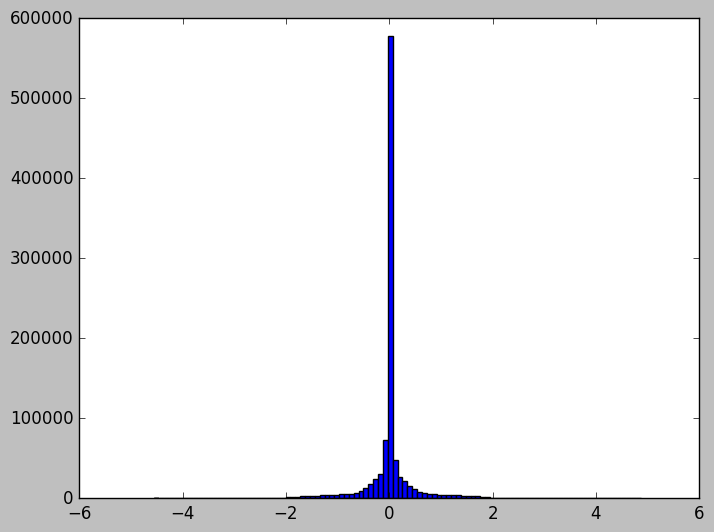

In [27]:
plt.hist([coeffs[i] for i in range(1, 1000000)], bins=100)

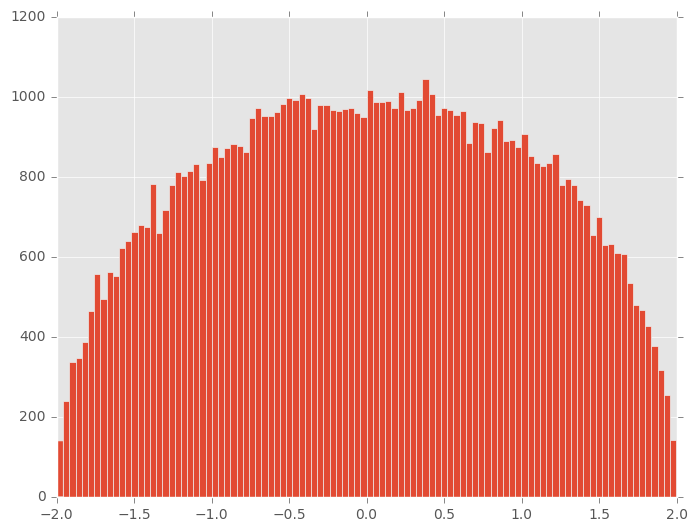

In [28]:
plt.style.use('ggplot')
plt.hist([coeffs[p] for p in primes_to_1000000], bins=100)
fig = plt.gcf()

In [29]:
#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
#axes.spines['left'].set_position('zero')
#axes.spines['bottom'].set_position('zero')
#xticks = [xtick_mult*(-10 + x) for x in range(21)]
#yticks = [ytick_mult*(-20 + x) for x in range(41)]
#plt.xticks(xticks)
#plt.yticks(yticks)
#plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])
#plt.xlabel("x")
#plt.ylabel("y")
#axes.grid(True, linestyle='--')

fig.set_size_inches(8, 6)
fig.savefig('circle4.png', bbox_inches='tight')

![circle plot](circle4.png)

In [33]:
tail = dict()
for c in range(1,150):
    tail[c] = len(list(filter(lambda e: abs(e) >= c/100, [sums[i]/i**.5 for i in range(1, len(sums))])))/(len(sums)-1)

In [34]:
tail[10]

0.8823447646895294

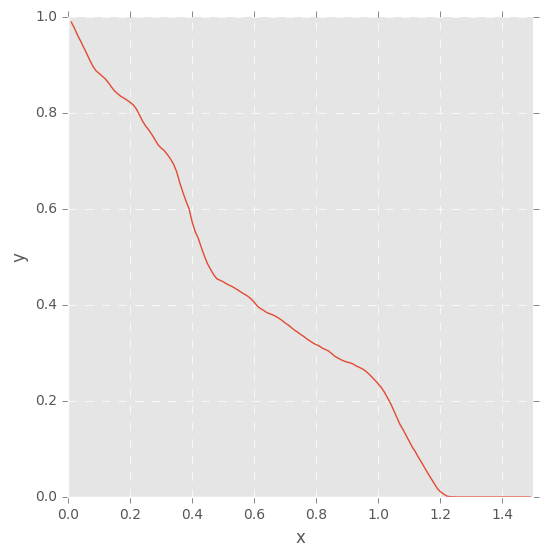

In [36]:
plt.style.use('ggplot')
tailxs = [c/100 for c in range(1,150)]
tailys = [tail[c] for c in range(1, 150)]
myplot.make_one_plot_by_pts(tailxs, tailys, xmin=0, ymin=0, xmax = 1.5, ymax=1,
                            xtick_mult=.2, ytick_mult=.2, figname='tailplot', save_format="png",
                           usecolor=True, figsize_x=6, figsize_y=6)